In [2]:
#Name:Aakash Desai
#SRN:PES1UG24CS006
#Section:A(3rd Semester)
#Department:Computer Science and Engineering
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
url = "https://github.com/trending"
response = requests.get(url)

In [3]:
soup = BeautifulSoup(response.text, 'html.parser')

In [4]:
repos = []
stars = []
programming_languages = []
descriptions = []

In [5]:
for article in soup.find_all('article', class_='Box-row'):
    repo_name_tag = article.find('h2', class_='h3 lh-condensed')
    if repo_name_tag:
        full_name = repo_name_tag.a['href']
        repos.append(full_name.strip('/'))
    else:
        repos.append(None)
    star_tag = article.find('a', href=lambda href: href and href.endswith('/stargazers'))
    if star_tag:
        star_text = star_tag.text.strip().replace(',', '')
        try:
            stars.append(int(star_text))
        except ValueError:
            stars.append(0)
    else:
        stars.append(0)
    lang_tag = article.find('span', itemprop='programmingLanguage')
    if lang_tag:
        programming_languages.append(lang_tag.text.strip())
    else:
        programming_languages.append('Unknown')  
    desc_tag = article.find('p', class_='col-9 color-fg-muted my-1 pr-4')
    if desc_tag:
        descriptions.append(desc_tag.text.strip())
    else:
        descriptions.append('No description provided')  

In [6]:
df = pd.DataFrame({
    'repository': repos,
    'stars': stars,
    'programming_language': programming_languages,
    'description': descriptions
})

In [7]:
df.dropna(subset=['repository'], inplace=True)

In [8]:
df.drop_duplicates(inplace=True) 

In [9]:
df.to_csv('cleaned_github_trending.csv', index=False)
print("Cleaned data saved to 'cleaned_github_trending.csv'")

Cleaned data saved to 'cleaned_github_trending.csv'


In [10]:
print("\nDescriptive Statistics for Stars:")
print(df['stars'].describe())


Descriptive Statistics for Stars:
count        20.000000
mean      20512.550000
std       27351.310515
min         934.000000
25%        5807.500000
50%       11976.000000
75%       19680.750000
max      123020.000000
Name: stars, dtype: float64


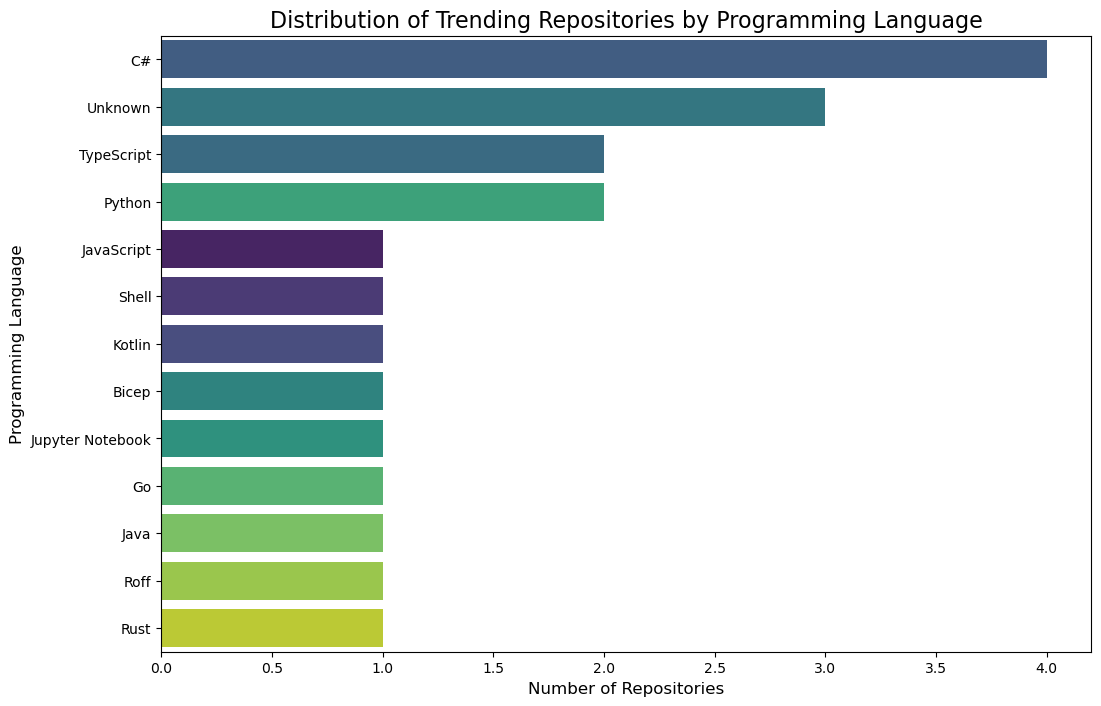

In [11]:
plt.figure(figsize=(12, 8))
sns.countplot(
    y='programming_language',
    data=df,
    order=df['programming_language'].value_counts().index,
    palette='viridis',
    hue='programming_language',
    legend=False  
)
plt.title('Distribution of Trending Repositories by Programming Language', fontsize=16)
plt.xlabel('Number of Repositories', fontsize=12)
plt.ylabel('Programming Language', fontsize=12)
plt.show()

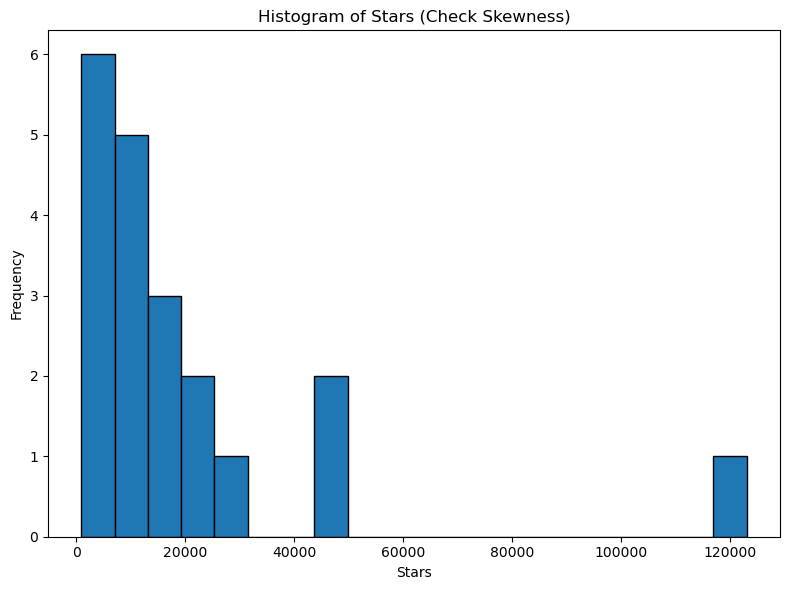

In [14]:
plt.figure(figsize=(8,6))
plt.hist(df["stars"], bins=20, edgecolor="black")
plt.title("Histogram of Stars (Check Skewness)")
plt.xlabel("Stars")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

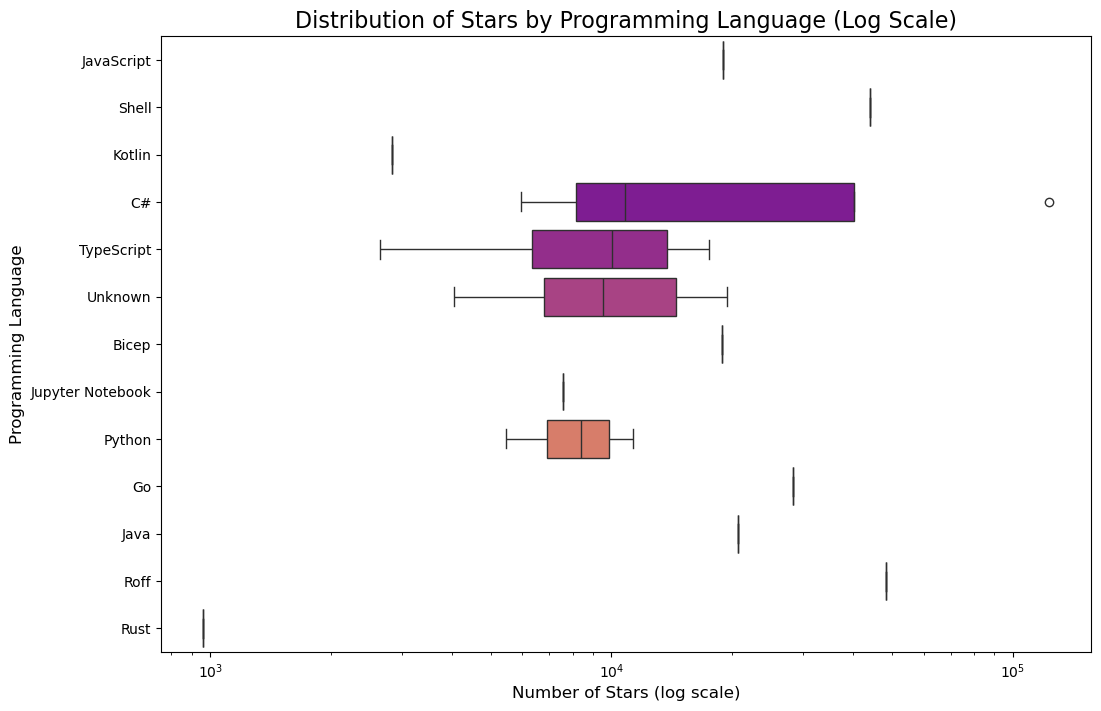

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup


url = "https://github.com/trending"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

repos = soup.find_all("article", class_="Box-row")
data = []

for repo in repos:
    name = repo.h2.a.get("href").strip("/")
    stars = repo.find("a", href=lambda x: x and x.endswith("/stargazers"))
    stars = int(stars.text.strip().replace(",", "")) if stars else 0
    language = repo.find("span", itemprop="programmingLanguage")
    language = language.text.strip() if language else "Unknown"
    data.append({"name": name, "stars": stars, "programming_language": language})

df = pd.DataFrame(data)


plt.figure(figsize=(12, 8))
sns.boxplot(
    x='stars',
    y='programming_language',
    hue='programming_language',
    data=df,
    palette='plasma',
    legend=False  
)

plt.xscale('log')  
plt.title('Distribution of Stars by Programming Language (Log Scale)', fontsize=16)
plt.xlabel('Number of Stars (log scale)', fontsize=12)
plt.ylabel('Programming Language', fontsize=12)
plt.show()

